In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
m_first_row = session.query(measurement).first()
m_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fef9b6f5370>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1}

In [11]:
s_first_row = session.query(station).first()
s_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fef9b6f5970>,
 'elevation': 3.0,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

first_date = session.query(measurement.date).order_by(measurement.date).first()

last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

print(f"The first date where data was recorded was {first_date}")
print(f"The last date where data was recorded was {last_date}")

The first date where data was recorded was ('2010-01-01',)
The last date where data was recorded was ('2017-08-23',)


In [13]:
# Calculate the date 1 year ago from the last data point in the database
#twelve_month_data = session.query(measurement.date).\
    #filter(measurement.date > 2016-08-23)

latest_data_date = dt.datetime.strptime(last_date[0], '%Y-%m-%d')
latest_data_date

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
year_ago


datetime.date(2016, 8, 23)

In [14]:
# Perform a query to retrieve the data and precipitation scores
target_scores = session.query(measurement.date, measurement.prcp).\
filter(measurement.date > year_ago).\
order_by(measurement.date).all()

print(target_scores)

[('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.02), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.05), ('2016-08-31', 0.13), (

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date


tarscores_pd = pd.DataFrame(target_scores)
tarscores_pd = tarscores_pd.set_index('date')
tarscores_pd = tarscores_pd.sort_values(['date'], ascending = True)
tarscores_pd = tarscores_pd.sort_index()
tarscores_pd.head()


,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


<function matplotlib.pyplot.show(close=None, block=None)>

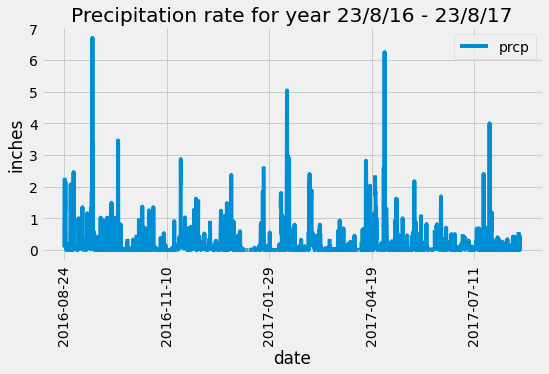

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
tarscores_pd.plot(figsize=(8, 4))
plt.xticks(rotation = 'vertical')
plt.ylabel('inches')
plt.title('Precipitation rate for year 23/8/16 - 23/8/17')
plt.show


In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data

tarscores_pd.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
session.query(station.id).count()

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [measurement.station, func.count(measurement.id)]
station_activity = session.query(*sel).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).all()
print(station_activity)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

sel = [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]

active_station_summary = session.query(*sel).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).first()
print(active_station_summary)

(54.0, 85.0, 71.66378066378067)


In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#active_station_query = session.query(measurement.tobs, measurement.station).\
    #filter(measurement.station == 'USC00519281').\
    #filter(measurement.date >= year_ago).all()
#active_station_query

In [22]:
active_station_query = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= year_ago).all()
active_station_query

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

Text(0.5, 0, 'Temperature')

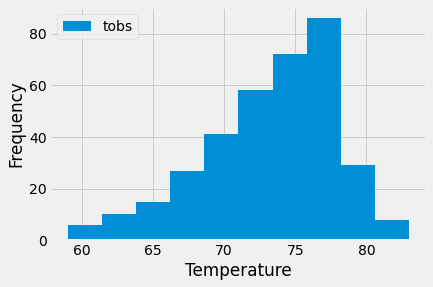

In [23]:
df = pd.DataFrame(active_station_query, columns = ['tobs'])
df.plot.hist()
plt.xlabel('Temperature')

## Bonus Challenge Assignment

In [24]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [42]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip_start = dt.date(2017, 8, 1) - dt.timedelta(days=365)
trip_end = dt.date(2017, 8, 23) - dt.timedelta(days=365)

print(trip_start, trip_end)

trip_weather = calc_temps(trip_start.strftime("%Y-%m-%d"), trip_end.strftime("%Y-%m-%d"))
print(trip_weather)

2016-08-01 2016-08-23
[(71.0, 78.15436241610739, 83.0)]


NameError: name 'tmax' is not defined

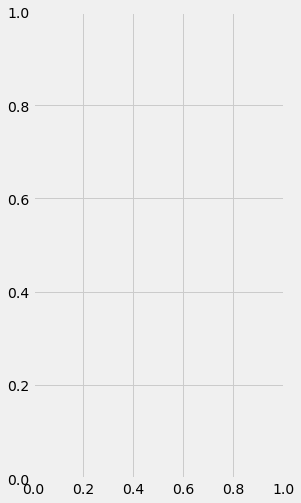

In [43]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
yerr = tmax-tmin

bar = ax.bar(xpos, tave, yerr=yerr, alpha=0.5, color = 'red', align = 'center')
ax.set(xticks = range(xpos), xticklabels = 'a', title = 'Average Temperature for Trip Duration', ylabel = 'Temperature (F)')
ax.margins(.2, .2)
fig.tight_layout()
fig.show()

In [44]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [station.station, station.name, station.longitude, station.latitude, station.elevation, func.sum(measurement.prcp)]



trip_weather_summary = session.query(*sel).\
    filter(measurement.station == station.station).\
    filter(measurement.date >= trip_start).\
    filter(measurement.date <= trip_end).\
    group_by(station.name).\
    order_by(func.sum(measurement.prcp).desc()).all()
print(trip_weather_summary)


[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', -157.8025, 21.3331, 152.4, 14.649999999999997), ('USC00519281', 'WAIHEE 837.5, HI US', -157.84888999999998, 21.45167, 32.9, 11.819999999999997), ('USC00513117', 'KANEOHE 838.1, HI US', -157.8015, 21.4234, 14.6, 6.029999999999999), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', -157.71139, 21.33556, 19.5, 2.1500000000000004), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', -157.8374, 21.5213, 7.0, 1.3100000000000003), ('USC00519397', 'WAIKIKI 717.2, HI US', -157.8168, 21.2716, 3.0, 1.1500000000000001), ('USC00517948', 'PEARL CITY, HI US', -157.9751, 21.3934, 11.9, 0.18)]


In [47]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [55]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
#freq D = daily
trip_date = pd.date_range(trip_start, trip_end, freq = 'D')
# Stip off the year and save a list of %m-%d strings
trip_month_day = trip_date.strftime('%m-%d')
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []

for date in trip_month_day:
    normals.append(*daily_normals(date))

normals

[(67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0),
 (68.0, 76.5576923076923, 83.0),
 (69.0, 75.98039215686275, 81.0),
 (65.0, 76.42, 83.0),
 (67.0, 75.98113207547169, 82.0),
 (67.0, 76.52727272727273, 83.0),
 (71.0, 76.98245614035088, 84.0),
 (71.0, 76.77777777777777, 82.0),
 (69.0, 76.47169811320755, 83.0),
 (69.0, 76.08, 83.0),
 (69.0, 76.125, 83.0),
 (70.0, 76.92307692307692, 84.0),
 (69.0, 75.94642857142857, 85.0),
 (68.0, 76.45283018867924, 82.0),
 (67.0, 76.4, 83.0),
 (69.0, 76.47169811320755, 84.0),
 (67.0, 76.6923076923077, 87.0)]

In [58]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame(normals, columns = ['tmin', 'tavg', 'tmax'])
df['date'] = trip_date
df.set_index(['date'], inplace = True)
df.head()


,tmin,tavg,tmax
date,,,
2016-08-01,67.0,75.540000,83.0
2016-08-02,68.0,75.603774,84.0
2016-08-03,70.0,76.611111,85.0
2016-08-04,69.0,76.711538,84.0
2016-08-05,69.0,76.148148,82.0


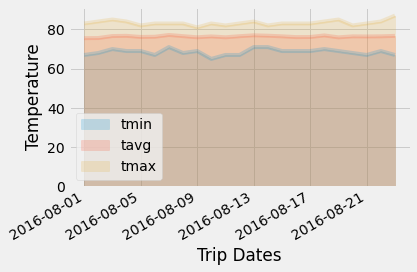

In [59]:
# Plot the daily normals as an area plot with `stacked=False`
df.plot(kind = 'area', stacked = False, x_compat = True, alpha = .2)
plt.xlabel('Trip Dates')
plt.ylabel('Temperature')
plt.tight_layout()